In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
odds = pd.read_csv('../OnCourt/odds_atpII.csv', sep=';')

In [55]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048"
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905"


In [56]:
import glob

In [59]:
path =r'../tennis_atp-master/Prueba' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [60]:
# 1. Take out matchs from Davies Cup:
framesD = frame[frame['tourney_level'] != 'D']
# 2. Take out matchs from Challenge CUP:
framesDC = framesD[framesD['tourney_level'] != 'C']
# 3.1. Take out marchs'W/O' (Walk Over):
framesDCWO = framesDC[framesDC['score'] != 'W/O']
# 3.2. Take out marchs' W/O' (Walk Over):
framesDCWO = framesDCWO[framesDCWO['score'] != ' W/O']
# 4. Take out matchs with high volume of NaNs:
framesDCWO2 = framesDCWO.dropna(axis=0, thresh=30)

In [61]:
framesDCWO2.shape

(47085, 49)

In [62]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [63]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik')]

In [64]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5


In [65]:
framesDCWO2[framesDCWO2['tourney_date'] == 20060828]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2384,2006-560,US Open,Hard,128,G,20060828,1,103819,1.0,NaN,Roger Federer,R,185.0,SUI,25.054073,1.0,7295.0,104499,NaN,NaN,Jimmy Wang,R,178.0,TPE,21.549624,109.0,394.0,6-4 6-1 6-0,5,R128,99.0,7.0,1.0,64.0,39.0,35.0,11.0,11.0,0.0,1.0,3.0,6.0,104.0,50.0,27.0,20.0,12.0,10.0,18.0
2385,2006-560,US Open,Hard,128,G,20060828,2,102450,NaN,NaN,Tim Henman,R,185.0,GBR,31.975359,62.0,640.0,102257,NaN,NaN,Greg Rusedski,L,193.0,GBR,32.974675,136.0,310.0,7-6(4) 6-2 6-3,5,R128,114.0,8.0,1.0,85.0,55.0,41.0,21.0,15.0,0.0,1.0,6.0,5.0,92.0,56.0,37.0,17.0,14.0,2.0,6.0
2386,2006-560,US Open,Hard,128,G,20060828,3,102434,NaN,NaN,Vincent Spadea,R,183.0,USA,32.109514,84.0,490.0,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,23.304586,91.0,443.0,6-2 6-4 6-3,5,R128,98.0,4.0,2.0,84.0,50.0,35.0,20.0,13.0,4.0,5.0,2.0,7.0,93.0,61.0,38.0,13.0,14.0,5.0,11.0
2387,2006-560,US Open,Hard,128,G,20060828,4,102035,29.0,NaN,Jonas Bjorkman,R,183.0,SWE,34.431211,35.0,953.0,104812,NaN,WC,Scoville Jenkins,R,188.0,USA,19.928816,277.0,137.0,7-5 6-4 6-4,5,R128,135.0,5.0,5.0,95.0,57.0,46.0,17.0,16.0,6.0,9.0,2.0,6.0,101.0,62.0,39.0,20.0,16.0,11.0,17.0
2388,2006-560,US Open,Hard,128,G,20060828,5,103292,21.0,NaN,Gaston Gaudio,R,175.0,ARG,27.718001,24.0,1175.0,104312,NaN,NaN,Andreas Seppi,R,190.0,ITA,22.516085,71.0,565.0,6-4 6-4 6-2,5,R128,106.0,7.0,2.0,82.0,47.0,37.0,21.0,14.0,4.0,5.0,8.0,6.0,88.0,49.0,32.0,18.0,14.0,2.0,7.0
2389,2006-560,US Open,Hard,128,G,20060828,6,105023,NaN,WC,Sam Querrey,R,198.0,USA,18.891170,174.0,238.0,104259,NaN,NaN,Philipp Kohlschreiber,R,178.0,GER,22.866530,63.0,619.0,6-3 6-4 6-4,5,R128,90.0,7.0,3.0,85.0,56.0,41.0,21.0,15.0,2.0,2.0,6.0,3.0,90.0,48.0,33.0,22.0,14.0,6.0,9.0
2390,2006-560,US Open,Hard,128,G,20060828,7,102967,NaN,NaN,Marc Gicquel,R,188.0,FRA,29.412731,79.0,504.0,103294,NaN,NaN,Christophe Rochus,R,170.0,BEL,27.701574,65.0,605.0,6-3 6-3 6-4,5,R128,94.0,21.0,1.0,80.0,49.0,39.0,16.0,14.0,1.0,3.0,1.0,5.0,89.0,49.0,32.0,17.0,14.0,2.0,8.0
2391,2006-560,US Open,Hard,128,G,20060828,8,103507,16.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,26.540726,18.0,1330.0,102567,NaN,Q,George Bastl,R,183.0,SUI,31.408624,142.0,291.0,7-5 6-4 3-6 6-3,5,R128,185.0,9.0,4.0,129.0,81.0,60.0,26.0,20.0,4.0,7.0,15.0,4.0,122.0,76.0,58.0,19.0,20.0,12.0,17.0
2392,2006-560,US Open,Hard,128,G,20060828,9,104607,12.0,NaN,Tomas Berdych,R,196.0,CZE,20.944559,14.0,1660.0,104081,NaN,NaN,Boris Pashanski,R,180.0,SRB,23.816564,87.0,456.0,6-4 6-2 6-1,5,R128,89.0,10.0,2.0,61.0,31.0,28.0,19.0,12.0,3.0,4.0,0.0,5.0,88.0,47.0,27.0,16.0,13.0,6.0,13.0
2393,2006-560,US Open,Hard,128,G,20060828,10,104252,NaN,NaN,Florian Mayer,R,190.0,GER,22.896646,58.0,675.0,102905,NaN,Q,Stefan Koubek,L,175.0,AUT,29.650924,123.0,358.0,6-4 6-1 6-1,5,R128,71.0,5.0,0.0,65.0,36.0,27.0,20.0,12.0,1.0,2.0,0.0,3.0,65.0,30.0,17.0,15.0,12.0,5.0,12.0


In [66]:
partido = odds[(odds['ID1_NAME'] == 'Marat Safin') & (odds['ID2_NAME'] == 'Robin Vik') & (odds['DATE'] == 20060828)]

In [67]:
partido

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5


In [68]:
partido2 = framesDCWO2[(framesDCWO2['winner_name'] == 'Marat Safin') & (framesDCWO2['loser_name'] == 'Robin Vik') 
                       & (framesDCWO2['tourney_date'] == 20060828)]

In [69]:
partido2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2401,2006-560,US Open,Hard,128,G,20060828,18,103498,NaN,NaN,Marat Safin,R,193.0,RUS,26.584531,104.0,400.0,103503,NaN,NaN,Robin Vik,R,183.0,CZE,26.55989,85.0,487.0,6-1 6-1 3-6 6-3,5,R128,108.0,15.0,0.0,89.0,53.0,44.0,21.0,16.0,6.0,7.0,6.0,2.0,103.0,68.0,45.0,15.0,16.0,7.0,13.0


#### VOY A GENERAR LA KEY de la matriz odd

In [70]:
odds['OddKey'] = odds[['ID1_NAME', 'ID2_NAME']].apply(lambda x: ''.join(x), axis=1)

In [71]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5,Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048",Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6,Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905",Tim HenmanGreg Rusedski


In [72]:
odds['OddKey2'] = odds['DATE'].map(str) + odds['OddKey']

In [73]:
odds.head()

,ID_B_O,ID1_O,ID1_NAME,ID2_O,ID2_NAME,ID_T_O,DATE,ID_R_O,K1,K2,OddKey,OddKey2
0,1,2,Marat Safin,722,Robin Vik,3810,20060828,4,"1,149999976",5,Marat SafinRobin Vik,20060828Marat SafinRobin Vik
1,1,116,Vince Spadea,685,Gilles Muller,3810,20060828,4,"1,5","2,450000048",Vince SpadeaGilles Muller,20060828Vince SpadeaGilles Muller
2,1,609,Dmitry Tursunov,516,Igor Kunitsyn,3810,20060828,4,"1,100000024",6,Dmitry TursunovIgor Kunitsyn,20060828Dmitry TursunovIgor Kunitsyn
3,1,19,Roger Federer,763,Jimmy Wang,3810,20060828,4,NaN,NaN,Roger FedererJimmy Wang,20060828Roger FedererJimmy Wang
4,1,9,Tim Henman,48,Greg Rusedski,3810,20060828,4,"1,320000052","3,099999905",Tim HenmanGreg Rusedski,20060828Tim HenmanGreg Rusedski


#### AHORA VOY A GENERAR la Key de la matriz frame:

In [74]:
framesDCWO2['OddKey'] = framesDCWO2[['winner_name', 'loser_name']].apply(lambda x: ''.join(x), axis=1)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron


In [76]:
framesDCWO2['OddKey2'] = framesDCWO2['tourney_date'].map(str) + framesDCWO2['OddKey']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron


#### Ahora vamos a hacer un diccionario con OddKey2 y K1

In [78]:
framesDCWO2["K1"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie,NaN
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit,NaN
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau,NaN
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob,NaN
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron,NaN


In [80]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [81]:
K1dict = dict(zip(odds.OddKey2, odds.K1))

In [82]:
framesDCWO2['K1'] = framesDCWO2['K1'].fillna(framesDCWO2['OddKey2'].map(K1dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

In [84]:
framesDCWO2["K2"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
K2dict = dict(zip(odds.OddKey2, odds.K2))

In [86]:
framesDCWO2['K2'] = framesDCWO2['K2'].fillna(framesDCWO2['OddKey2'].map(K2dict))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [87]:
framesDCWO2.isnull().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           25252
winner_entry          40954
winner_name               0
winner_hand               0
winner_ht              1447
winner_ioc                0
winner_age                0
winner_rank             603
winner_rank_points      603
loser_id                  0
loser_seed            35437
loser_entry           36789
loser_name                0
loser_hand                0
loser_ht               2591
loser_ioc                 0
loser_age                 2
loser_rank              688
loser_rank_points       688
score                     0
best_of                   0
round                     0
minutes                1295
w_ace                     0
w_df                      0
w_svpt                    0
w_1stIn                   0
w_1stWon            

#### Ahora vamos a analizar variables:
#### a) Variables constantes:
    1. Hand
    2. Best of
#### b) Variables que constantes por diferencias:
1. Diferencia de edad
2. Diferencia de altura
3. Diferencia de rank
4. Diferencia de odds

#### c) Variables que cambian con el tiempo:
1. % victoria sobre tierra/cesped/etc
2. % victoria sobre torneos (Grand Slama/Open/etc...)
3. % minues per match
4. % Ret por temporada
5. % Aces
6. % df
7. %

#### d) Otras variables:
1. Victorias en los ultimos 5 partidos
2. % Victoria Head to Head
3. Victorias en los ultimos partidos Head to Head

#### Voy a hacer mi base line:

In [91]:
framesDCWO2_bl = framesDCWO2[['tourney_date', 'winner_rank', 'loser_rank']]

In [93]:
framesDCWO2_bl['dif_rank'] = framesDCWO2_bl['winner_rank'] - framesDCWO2_bl['loser_rank']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
framesDCWO2_bl.head()

,tourney_date,winner_rank,loser_rank,dif_rank
0,20000501,113.0,50.0,63.0
1,20000501,352.0,139.0,213.0
2,20000501,103.0,133.0,-30.0
3,20000501,107.0,95.0,12.0
4,20000501,74.0,111.0,-37.0


In [ ]:
framesDCWO2_bl.shape

In [100]:
framesDCWO2_bl.isnull().sum()

tourney_date      0
winner_rank     603
loser_rank      688
dif_rank        710
dtype: int64

In [104]:
framesDCWO2_b2 = framesDCWO2_bl.dropna(subset = ['winner_rank', 'loser_rank', 'dif_rank'])

In [105]:
framesDCWO2_b2.shape

(46375, 4)

In [106]:
framesDCWO2_b2.isnull().sum()

tourney_date    0
winner_rank     0
loser_rank      0
dif_rank        0
dtype: int64

In [108]:
framesDCWO2_b2_Float = framesDCWO2_b2[['winner_rank','loser_rank','dif_rank']]

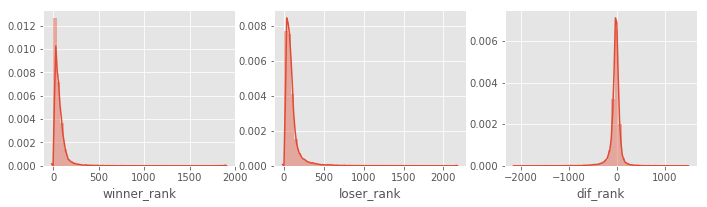

In [109]:
plt.figure(figsize=(20,20))
for index,col in enumerate(framesDCWO2_b2_Float.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(framesDCWO2_b2_Float[col])

#### Vamos a normalizar las variables

In [110]:
framesDCWO2_b2['winner_rank'].mean()

58.495374663072774

In [202]:
framesDCWO2_b2['loser_rank'].mean()

91.935525606469

In [114]:
loser_rank_mean = framesDCWO2_b2['loser_rank'].mean()
loser_rank_std = framesDCWO2_b2['loser_rank'].std()
framesDCWO2_b2['loser_rank_N'] = framesDCWO2_b2['loser_rank'].apply(lambda x: (x - loser_rank_mean )/loser_rank_std)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [111]:
winner_rank_mean = framesDCWO2_b2['winner_rank'].mean()
winner_rank_std = framesDCWO2_b2['winner_rank'].std()
framesDCWO2_b2['winner_rank_N'] = framesDCWO2_b2['winner_rank'].apply(lambda x: (x - winner_rank_mean )/winner_rank_std)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [116]:
dif_rank_mean = framesDCWO2_b2['dif_rank'].mean()
dif_rank_std = framesDCWO2_b2['dif_rank'].std()
framesDCWO2_b2['dif_rank_N'] = framesDCWO2_b2['dif_rank'].apply(lambda x: (x - dif_rank_mean )/dif_rank_std)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [117]:
framesDCWO2_b2.head()

,tourney_date,winner_rank,loser_rank,dif_rank,winner_rank_N,loser_rank_N,dif_rank_N
0,20000501,113.0,50.0,63.0,0.748044,-0.359879,0.743142
1,20000501,352.0,139.0,213.0,4.028178,0.403894,1.899002
2,20000501,103.0,133.0,-30.0,0.610800,0.352404,0.026509
3,20000501,107.0,95.0,12.0,0.665697,0.026298,0.350150
4,20000501,74.0,111.0,-37.0,0.212792,0.163606,-0.027431


In [136]:
framesDCWO2_b2['Y'] = 1

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [137]:
framesDCWO2_b2.head()

,tourney_date,winner_rank,loser_rank,dif_rank,winner_rank_N,loser_rank_N,dif_rank_N,Y
0,20000501,113.0,50.0,63.0,0.748044,-0.359879,0.743142,1
1,20000501,352.0,139.0,213.0,4.028178,0.403894,1.899002,1
2,20000501,103.0,133.0,-30.0,0.610800,0.352404,0.026509,1
3,20000501,107.0,95.0,12.0,0.665697,0.026298,0.350150,1
4,20000501,74.0,111.0,-37.0,0.212792,0.163606,-0.027431,1


In [150]:
framesDCWO2_b2.isnull().sum()

tourney_date     0
winner_rank      0
loser_rank       0
dif_rank         0
winner_rank_N    0
loser_rank_N     0
dif_rank_N       0
Y                0
dtype: int64

In [139]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model

In [158]:
X_w = framesDCWO2_b2[['winner_rank_N', 'dif_rank_N']]
X_w['Y'] = 1

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [159]:
X_l = framesDCWO2_b2[['loser_rank_N', 'dif_rank_N']]
X_l['Y'] = 0

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [162]:
X_l.head()

,loser_rank_N,dif_rank_N,Y
0,-0.359879,0.743142,0
1,0.403894,1.899002,0
2,0.352404,0.026509,0
3,0.026298,0.350150,0
4,0.163606,-0.027431,0


In [163]:
frame = [X_w, X_l]
result = pd.concat(frame)

In [169]:
result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2644,0,-0.297132,-0.119591,NaN
379,0,0.712319,-0.540095,NaN
837,0,-0.458952,0.180770,NaN
1554,1,-0.281720,NaN,-0.240114
200,0,0.712319,-0.351297,NaN


In [170]:
result['loser_rank_N']=result['loser_rank_N'].fillna(0)
result['winner_rank_N']=result['winner_rank_N'].fillna(0)

In [174]:
result.sample(5)

,Y,dif_rank_N,loser_rank_N,winner_rank_N
2195,1,0.203741,0.0,-0.075421
2102,1,0.142095,0.0,-0.445980
1388,1,0.319327,0.0,-0.322460
843,1,0.319327,0.0,0.528453
797,1,-2.393091,0.0,-0.624397


In [175]:
result.shape

(92750, 4)

In [183]:
X.shape

(92750, 3)

In [185]:
Y.shape

(92750, 1)

In [182]:
X = result[['dif_rank_N','loser_rank_N','winner_rank_N']]

In [191]:
y = result[['Y']]

In [186]:
logreg = linear_model.LogisticRegression()

In [187]:
logreg.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
### OK No sabemos meter las variables para hacer la regresion

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
neigh = KNeighborsClassifier(n_neighbors = 3)

In [192]:
neigh.fit(X, y)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [200]:
(neigh.predict([[0.5,0.0,-0.12]]))

array([1])

In [201]:
(neigh.predict([[-0.33,3.0,0.0]]))

array([0])

#### Las predicciones funcionan, el rank medio del ganador es 58 frente a 91 del perdedor, por tanto la tendencia es dar como ganador al que tenga el rank mas bajo.

In [194]:
from sklearn.model_selection import cross_val_score

In [198]:
np.average(cross_val_score(neigh, X, y, cv=10))

IndexError: too many indices for array

In [199]:
## Tampoco nos sale un kmeans

#### Hago una prueba con las variables constantes por diferncias:

In [88]:
framesDCWO2['dif_edad'] = framesDCWO2['winner_age'] - framesDCWO2['loser_age']

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [89]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,OddKey,OddKey2,K1,K2,dif_edad
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,1.0,NaN,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,Antony DupuisAndrew Ilie,20000501Antony DupuisAndrew Ilie,NaN,NaN,3.145791
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,NaN,WC,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,Fernando GonzalezCecil Mamiit,20000501Fernando GonzalezCecil Mamiit,NaN,NaN,-4.087611
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,NaN,NaN,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,Paradorn SrichaphanSebastien Lareau,20000501Paradorn SrichaphanSebastien Lareau,NaN,NaN,-6.130048
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,8.0,NaN,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,Jan SiemerinkJustin Gimelstob,20000501Jan SiemerinkJustin Gimelstob,NaN,NaN,6.787132
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,4.0,NaN,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,NaN,NaN,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,Jason StoltenbergAlex Lopez Moron,20000501Jason StoltenbergAlex Lopez Moron,NaN,NaN,0.651608
